In [1]:
# unique molecule counts of 9 cell lines from MiSeq, NextSeq, and Xleap
!pfda download file-GkP81gQ07qQk61YzVyy19J2j-1
!pfda download file-GkP81gj07qQjP2G84qfGjY0P-1
!pfda download file-GkP81j007qQy06B083K6p57p-1

>> Preparing to download
     File Size :  1.521KiB
>> File /home/miguelp95/projects/BCR-SEQC/resource_paper_figures/gen1_heavy_9cls_uni.csv already exists
Use the arrow keys to navigate: ↓ ↑ → ← 
?   Overwrite already existing path?  [Yes/No]: 
  ▸ Yes
    No
1Besexisting path?  [Yes/No]:  ← 
2024/11/26 11:21:49 Prompt failed ^C
>> Preparing to download
     File Size :  1.528KiB
>> File /home/miguelp95/projects/BCR-SEQC/resource_paper_figures/gen2_heavy_9cls_uni.csv already exists
Use the arrow keys to navigate: ↓ ↑ → ← 
?   Overwrite already existing path?  [Yes/No]: 
  ▸ Yes
    No
1Besexisting path?  [Yes/No]:  ← 
2024/11/26 11:22:03 Prompt failed ^C
>> Preparing to download
     File Size :  1.492KiB
>> File /home/miguelp95/projects/BCR-SEQC/resource_paper_figures/miseq_heavy_9cls_uni.csv already exists
Use the arrow keys to navigate: ↓ ↑ → ← 
?   Overwrite already existing path?  [Yes/No]: 
  ▸ Yes
    No
1Besexisting path?  [Yes/No]:  ← 
2024/11/26 11:22:22 Prompt failed ^C


In [1]:
!pfda download file-GkBfPK807qQZ1FXypQvQ8f7j-1

>> Preparing to download
     File Size :  1.709KiB
>> Output File :  /home/miguelp95/projects/BCR-SEQC/resource_paper_figures/gen2_light_9cls_uni.csv
                  100.0% (1.709KiB of 1.709KiB)
>> Done!



In [2]:
# !pip install openpyxl
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 2.6 MB/s eta 0:00:00a 0:00:01


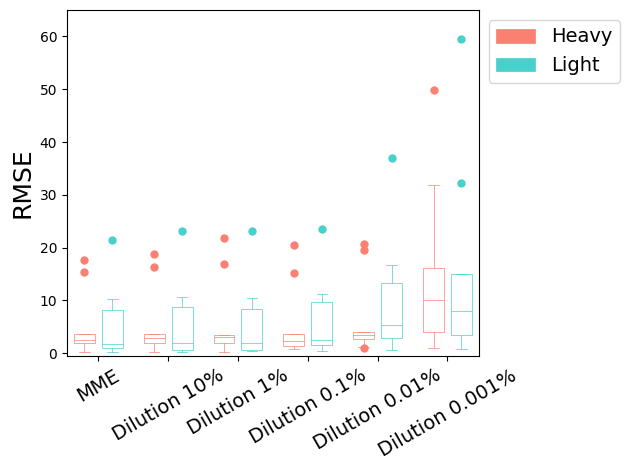

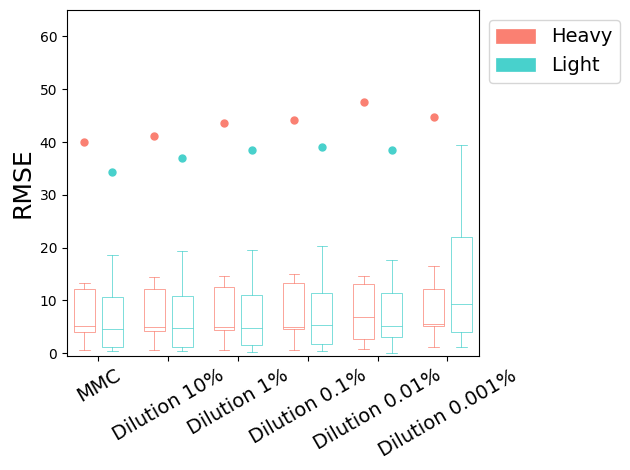

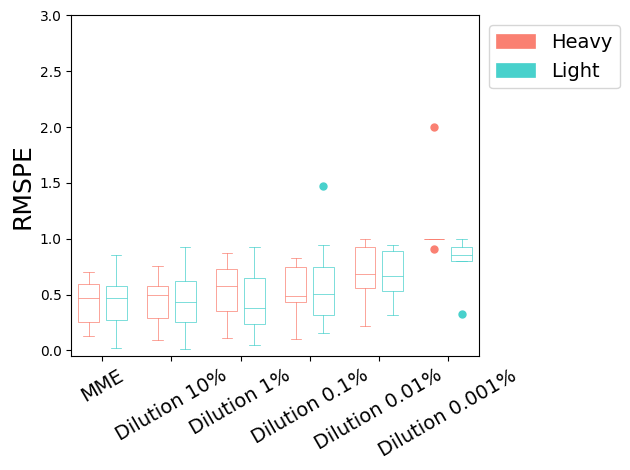

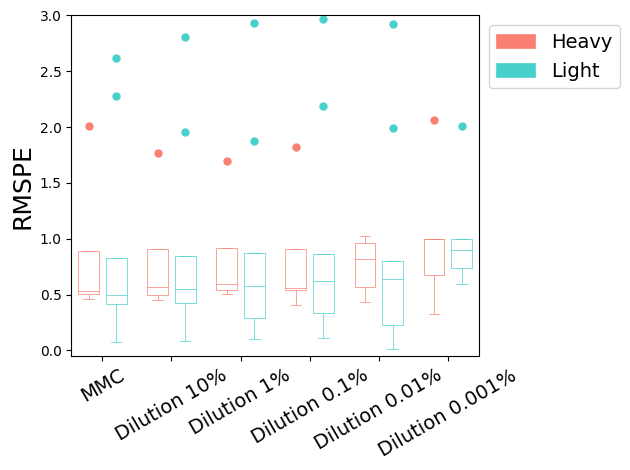

In [16]:
import pandas as pd
import os
import re
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.patches as mpatches


#### for all 3 datasets, just change the list of heavy_files and light_files
heavy_files = ["gen2_heavy_9cls_uni.csv"]
light_files = ["gen2_light_9cls_uni.csv"]

heavy_dfs = [pd.read_csv(file, index_col=0) for file in heavy_files]
light_dfs = [pd.read_csv(file, index_col=0) for file in light_files]

cols = ['WSU-NHL', 'WSU-DLCL', 'LB5871-LYMP', 'EHEB', 'OCI-LY1', 'RI-1', 'DAUDI', 'JK-6', 'MEC-1']
heavy_dfs = [df.reindex(columns=cols) for df in heavy_dfs]
light_dfs = [df.reindex(columns=cols) for df in light_dfs]

new_order_h = [
    '2-MME-L1-HC', '2-MME-L2-HC', '2-MME-L3-HC',
    '2-D1-L1-HC', '2-D1-L2-HC', '2-D1-L3-HC',
    '2-D2-L1-HC', '2-D2-L2-HC', '2-D2-L3-HC',
    '2-D3-L1-HC', '2-D3-L2-HC', '2-D3-L3-HC',
    '2-D4-L1-HC', '2-D4-L2-HC', '2-D4-L3-HC',
    '2-D5-L1-HC', '2-D5-L2-HC', '2-D5-L3-HC',
    '2-PBMC-L1-HC', '2-PBMC-L2-HC', '2-PBMC-L3-HC',
    '3-MMC-L1-HC', '3-D1-L1-HC', '3-D2-L1-HC',
    '3-D3-L1-HC', '3-D4-L1-HC', '3-D5-L1-HC', '3-PBMC-L1-HC'
]

new_order_l = [
    '2-MME-L1-LC', '2-MME-L2-LC', '2-MME-L3-LC',
    '2-D1-L1-LC', '2-D1-L2-LC', '2-D1-L3-LC',
    '2-D2-L1-LC', '2-D2-L2-LC', '2-D2-L3-LC',
    '2-D3-L1-LC', '2-D3-L2-LC', '2-D3-L3-LC',
    '2-D4-L1-LC', '2-D4-L2-LC', '2-D4-L3-LC',
    '2-D5-L1-LC', '2-D5-L2-LC', '2-D5-L3-LC',
    '2-PBMC-L1-LC', '2-PBMC-L2-LC', '2-PBMC-L3-LC',
    '3-MMC-L1-LC', '3-D1-L1-LC', '3-D2-L1-LC',
    '3-D3-L1-LC', '3-D4-L1-LC', '3-D5-L1-LC', '3-PBMC-L1-LC'
]

heavy_dfs = [df.reindex(new_order_h).fillna(0) for df in heavy_dfs]
light_dfs = [df.reindex(new_order_l).fillna(0) for df in light_dfs]

### normalization

normalize = False

if normalize:
    tpm = pd.read_excel('BCR-SEQC_50_cell_lines_IG_TPM.xlsx', index_col=0)
    tpm = tpm.loc[cols]

    mean_h = tpm['Heavy'].mean()
    mean_l = tpm['Light'].mean()

    tpm['sf_mean_heavy'] = mean_h / tpm['Heavy']
    tpm['sf_mean_light'] = mean_l / tpm['Light']

    for df in heavy_dfs:
        for col in df.columns:
            if col in tpm.index:
                df[col] = df[col] * tpm.loc[col, 'sf_mean_heavy']

    for df in light_dfs:
        for col in df.columns:
            if col in tpm.index:
                df[col] = df[col] * tpm.loc[col, 'sf_mean_light']

def convert_to_fraction(df):
    df = df.fillna(0)
    df['total'] = df[cols].sum(axis=1)
    df[cols] = df[cols].div(df['total'], axis=0) * 100
    return df.drop(columns=['total']).fillna(0)

heavy_frac_dfs = [convert_to_fraction(df) for df in heavy_dfs]
light_frac_dfs = [convert_to_fraction(df) for df in light_dfs]

heavy_frac_2_dfs = [df[df.index.str.startswith('2')] for df in heavy_frac_dfs]
heavy_frac_3_dfs = [df[df.index.str.startswith('3')] for df in heavy_frac_dfs]

light_frac_2_dfs = [df[df.index.str.startswith('2')] for df in light_frac_dfs]
light_frac_3_dfs = [df[df.index.str.startswith('3')] for df in light_frac_dfs]

# miseq_heavy_frac_2 = heavy_frac_2_dfs[0]
# gen1_heavy_frac_2 = heavy_frac_2_dfs[1]
# gen2_heavy_frac_2 = heavy_frac_2_dfs[2]

# miseq_heavy_frac_3 = heavy_frac_3_dfs[0]
# gen1_heavy_frac_3 = heavy_frac_3_dfs[1]
# gen2_heavy_frac_3 = heavy_frac_3_dfs[2]

# miseq_light_frac_2 = light_frac_2_dfs[0]
# gen1_light_frac_2 = light_frac_2_dfs[1]
# gen2_light_frac_2 = light_frac_2_dfs[2]

# miseq_light_frac_3 = light_frac_3_dfs[0]
# gen1_light_frac_3 = light_frac_3_dfs[1]
# gen2_light_frac_3 = light_frac_3_dfs[2]
gen2_heavy_frac_2 = heavy_frac_2_dfs[0]
gen2_heavy_frac_3 = heavy_frac_3_dfs[0]

gen2_light_frac_2 = light_frac_2_dfs[0]
gen2_light_frac_3 = light_frac_3_dfs[0]

dfs_mme = [gen2_heavy_frac_2, gen2_light_frac_2]
dfs_mmc = [gen2_heavy_frac_3, gen2_light_frac_3]

# GEM-X 5' v3 as standard for mme
stardard_mme = [[1, 2, 3, 4, 5, 10, 15, 25, 35]] * len(gen2_heavy_frac_2.index)
stardard_mmc = [[1.10, 2.58, 5.50, 8.66, 2.67, 15.70, 24.41, 13.14, 25.39]] * len(gen2_heavy_frac_3.index)
predicted_mme = pd.DataFrame(stardard_mme, columns=cols)
predicted_mme.index=gen2_heavy_frac_2.index
predicted_mmc = pd.DataFrame(stardard_mmc, columns=cols)
predicted_mmc.index=gen2_heavy_frac_3.index

def calculate_rmse(dataframes, chains, predicted, step, index_labels):
    results = {}
    for df, chain in zip(dataframes, chains):
        rmse = pd.DataFrame(columns=df.columns)
        for i in range(0, df.shape[0], step):
            sample_rmse = []
            for col in df.columns:
                y_true = df[col].iloc[i:i+step]
                y_pred = predicted[col].iloc[i:i+step]
                sample_rmse.append(np.sqrt(mean_squared_error(y_true, y_pred)))
            rmse.loc[i//step] = sample_rmse
        rmse.index = index_labels
        results[f'rmse_{chain}'] = rmse
    return results

chains = ['heavy', 'light']
index_labels_mme = ['MME', 'D1', 'D2', 'D3', 'D4', 'D5', 'PBMC']
index_labels_mmc = ['MMC', 'D1', 'D2', 'D3', 'D4', 'D5', 'PBMC']

rmse_results_mme = calculate_rmse(dfs_mme, chains, predicted_mme, 3, index_labels_mme)
rmse_results_mmc = calculate_rmse(dfs_mmc, chains, predicted_mmc, 1, index_labels_mmc)

rmse_heavy_mme = rmse_results_mme['rmse_heavy']
rmse_light_mme = rmse_results_mme['rmse_light']

rmse_heavy_mmc = rmse_results_mmc['rmse_heavy']
rmse_light_mmc = rmse_results_mmc['rmse_light']


chosen_rows = ['MME', 'D1', 'D2', 'D3', 'D4', 'D5']
rmse_heavy_mme_filtered = rmse_heavy_mme.loc[chosen_rows]
rmse_light_mme_filtered = rmse_light_mme.loc[chosen_rows]

fig, ax = plt.subplots()

positions = np.arange(len(chosen_rows)) * 2.0
rmse_heavy_mme_filtered.T.boxplot(ax=ax, positions=positions - 0.4, widths=0.6, patch_artist=True,
                                  boxprops=dict(color='salmon', linewidth=0.5, facecolor='none'),
                                  medianprops=dict(color='salmon', linewidth=0.5),
                                  whiskerprops=dict(color='salmon', linewidth=0.5),
                                  capprops=dict(color='salmon', linewidth=0.5),
                                  flierprops=dict(marker='o', markerfacecolor='salmon', linewidth=0.5, markeredgecolor='salmon', markersize=5))


rmse_light_mme_filtered.T.boxplot(ax=ax, positions=positions + 0.4, widths=0.6, patch_artist=True,
                                  boxprops=dict(color='mediumturquoise', linewidth=0.5, facecolor='none'),
                                  medianprops=dict(color='mediumturquoise', linewidth=0.5),
                                  whiskerprops=dict(color='mediumturquoise', linewidth=0.5),
                                  capprops=dict(color='mediumturquoise', linewidth=0.5),
                                  flierprops=dict(marker='o', markerfacecolor='mediumturquoise', linewidth=0.5, markeredgecolor='mediumturquoise', markersize=5))


ax.set_ylabel('RMSE', fontsize=18)
ax.set_ylim(-0.5,65)
ax.set_xticks(positions)
fig.set_edgecolor(None)
ax.set_xticklabels(['MME', 'Dilution 10%', 'Dilution 1%', 'Dilution 0.1%', 'Dilution 0.01%', 'Dilution 0.001%'], rotation = 30, fontsize=14)

ax.grid(False)

heavy_patch = mpatches.Patch(color='salmon', linewidth=0.5, label='Heavy')
light_patch = mpatches.Patch(color='mediumturquoise', linewidth=0.5, label='Light')
ax.legend(handles=[heavy_patch, light_patch], loc='upper left', bbox_to_anchor=(1, 1), fontsize=14)

fig.tight_layout()
if normalize:
    plt.savefig('rmse_mme_norm.svg')
else:
  plt.savefig('rmse_mme_un_norm.svg')

chosen_rows_mmc = ['MMC', 'D1', 'D2', 'D3', 'D4', 'D5']
rmse_heavy_mmc_filtered = rmse_heavy_mmc.loc[chosen_rows_mmc]
rmse_light_mmc_filtered = rmse_light_mmc.loc[chosen_rows_mmc]

fig, ax = plt.subplots()

positions = np.arange(len(chosen_rows)) * 2.0
rmse_heavy_mmc_filtered.T.boxplot(ax=ax, positions=positions - 0.4, widths=0.6, patch_artist=True,
                                  boxprops=dict(color='salmon', linewidth=0.5, facecolor='none'),
                                  medianprops=dict(color='salmon', linewidth=0.5),
                                  whiskerprops=dict(color='salmon', linewidth=0.5),
                                  capprops=dict(color='salmon', linewidth=0.5),
                                  flierprops=dict(marker='o', markerfacecolor='salmon', linewidth=0.5, markeredgecolor='salmon', markersize=5))


rmse_light_mmc_filtered.T.boxplot(ax=ax, positions=positions + 0.4, widths=0.6, patch_artist=True,
                                  boxprops=dict(color='mediumturquoise', linewidth=0.5, facecolor='none'),
                                  medianprops=dict(color='mediumturquoise', linewidth=0.5),
                                  whiskerprops=dict(color='mediumturquoise', linewidth=0.5),
                                  capprops=dict(color='mediumturquoise', linewidth=0.5),
                                  flierprops=dict(marker='o', markerfacecolor='mediumturquoise', linewidth=0.5, markeredgecolor='mediumturquoise', markersize=5))


ax.set_ylabel('RMSE', fontsize=18)
ax.set_ylim(-0.5,65)
ax.set_xticks(positions)
fig.set_edgecolor(None)
ax.set_xticklabels(['MMC', 'Dilution 10%', 'Dilution 1%', 'Dilution 0.1%', 'Dilution 0.01%', 'Dilution 0.001%'], rotation = 30, fontsize=14)

ax.grid(False)

heavy_patch = mpatches.Patch(color='salmon', linewidth=0.5, label='Heavy')
light_patch = mpatches.Patch(color='mediumturquoise', linewidth=0.5, label='Light')
ax.legend(handles=[heavy_patch, light_patch], loc='upper left', bbox_to_anchor=(1, 1), fontsize=14)

fig.tight_layout()
if normalize:
    plt.savefig('rmse_mmc_norm.svg')
else:
  plt.savefig('rmse_mmc_un_norm.svg')



def calculate_rmspe(dataframes, chains, predicted, step, index_labels):
    results = {}
    for df, chain in zip(dataframes, chains):
        rmspe = pd.DataFrame(columns=df.columns)
        for i in range(0, df.shape[0], step):
            sample_rmspe = []
            for col in df.columns:
                y_true = np.array(df[col].iloc[i:i+step])
                y_pred = np.array(predicted[col].iloc[i:i+step])

                rmspe_value = np.sqrt(np.mean(((y_pred - y_true) / y_pred) ** 2))

                sample_rmspe.append(rmspe_value)
            rmspe.loc[i//step] = sample_rmspe
        rmspe.index = index_labels
        results[f'rmspe_{chain}'] = rmspe
    return results

chains = ['heavy', 'light']
index_labels_mme = ['MME', 'D1', 'D2', 'D3', 'D4', 'D5', 'PBMC']
index_labels_mmc = ['MMC', 'D1', 'D2', 'D3', 'D4', 'D5', 'PBMC']

rmspe_results_mme = calculate_rmspe(dfs_mme, chains, predicted_mme, 3, index_labels_mme)
rmspe_results_mmc = calculate_rmspe(dfs_mmc, chains, predicted_mmc, 1, index_labels_mmc)

rmspe_heavy_mme = rmspe_results_mme['rmspe_heavy']
rmspe_light_mme = rmspe_results_mme['rmspe_light']

rmspe_heavy_mmc = rmspe_results_mmc['rmspe_heavy']
rmspe_light_mmc = rmspe_results_mmc['rmspe_light']

chosen_rows = ['MME', 'D1', 'D2', 'D3', 'D4', 'D5']
rmspe_heavy_mme_filtered = rmspe_heavy_mme.loc[chosen_rows]
rmspe_light_mme_filtered = rmspe_light_mme.loc[chosen_rows]

fig, ax = plt.subplots()

positions = np.arange(len(chosen_rows)) * 2.0
rmspe_heavy_mme_filtered.T.boxplot(ax=ax, positions=positions - 0.4, widths=0.6, patch_artist=True,
                                  boxprops=dict(color='salmon', linewidth=0.5, facecolor='none'),
                                  medianprops=dict(color='salmon', linewidth=0.5),
                                  whiskerprops=dict(color='salmon', linewidth=0.5),
                                  capprops=dict(color='salmon', linewidth=0.5),
                                  flierprops=dict(marker='o', markerfacecolor='salmon', linewidth=0.5, markeredgecolor='salmon', markersize=5))

rmspe_light_mme_filtered.T.boxplot(ax=ax, positions=positions + 0.4, widths=0.6, patch_artist=True,
                                  boxprops=dict(color='mediumturquoise', linewidth=0.5, facecolor='none'),
                                  medianprops=dict(color='mediumturquoise', linewidth=0.5),
                                  whiskerprops=dict(color='mediumturquoise', linewidth=0.5),
                                  capprops=dict(color='mediumturquoise', linewidth=0.5),
                                  flierprops=dict(marker='o', markerfacecolor='mediumturquoise', linewidth=0.5, markeredgecolor='mediumturquoise', markersize=5))

ax.set_ylabel('RMSPE', fontsize=18)
ax.set_ylim(-0.05,3)
ax.set_xticks(positions)
fig.set_edgecolor(None)
ax.set_xticklabels(['MME', 'Dilution 10%', 'Dilution 1%', 'Dilution 0.1%', 'Dilution 0.01%', 'Dilution 0.001%'], rotation = 30, fontsize=14)

ax.grid(False)

heavy_patch = mpatches.Patch(color='salmon', linewidth=0.5, label='Heavy')
light_patch = mpatches.Patch(color='mediumturquoise', linewidth=0.5, label='Light')
ax.legend(handles=[heavy_patch, light_patch], loc='upper left', bbox_to_anchor=(1, 1), fontsize=14)

fig.tight_layout()
if normalize:
    plt.savefig('rmspe_mme_norm.svg')
else:
    plt.savefig('rmspe_mme_un_norm.svg')

chosen_rows_mmc = ['MMC', 'D1', 'D2', 'D3', 'D4', 'D5']
rmspe_heavy_mmc_filtered = rmspe_heavy_mmc.loc[chosen_rows_mmc]
rmspe_light_mmc_filtered = rmspe_light_mmc.loc[chosen_rows_mmc]

fig, ax = plt.subplots()

positions = np.arange(len(chosen_rows)) * 2.0
rmspe_heavy_mmc_filtered.T.boxplot(ax=ax, positions=positions - 0.4, widths=0.6, patch_artist=True,
                                  boxprops=dict(color='salmon', linewidth=0.5, facecolor='none'),
                                  medianprops=dict(color='salmon', linewidth=0.5),
                                  whiskerprops=dict(color='salmon', linewidth=0.5),
                                  capprops=dict(color='salmon', linewidth=0.5),
                                  flierprops=dict(marker='o', markerfacecolor='salmon', linewidth=0.5, markeredgecolor='salmon', markersize=5))

rmspe_light_mmc_filtered.T.boxplot(ax=ax, positions=positions + 0.4, widths=0.6, patch_artist=True,
                                  boxprops=dict(color='mediumturquoise', linewidth=0.5, facecolor='none'),
                                  medianprops=dict(color='mediumturquoise', linewidth=0.5),
                                  whiskerprops=dict(color='mediumturquoise', linewidth=0.5),
                                  capprops=dict(color='mediumturquoise', linewidth=0.5),
                                  flierprops=dict(marker='o', markerfacecolor='mediumturquoise', linewidth=0.5, markeredgecolor='mediumturquoise', markersize=5))

ax.set_ylabel('RMSPE', fontsize=18)
ax.set_ylim(-0.05,3)
ax.set_xticks(positions)
fig.set_edgecolor(None)
ax.set_xticklabels(['MMC', 'Dilution 10%', 'Dilution 1%', 'Dilution 0.1%', 'Dilution 0.01%', 'Dilution 0.001%'], rotation = 30, fontsize=14)

ax.grid(False)

heavy_patch = mpatches.Patch(color='salmon', linewidth=0.5, label='Heavy')
light_patch = mpatches.Patch(color='mediumturquoise', linewidth=0.5, label='Light')
ax.legend(handles=[heavy_patch, light_patch], loc='upper left', bbox_to_anchor=(1, 1), fontsize=14)

fig.tight_layout()
if normalize:
    plt.savefig('rmspe_mmc_norm.svg')
else:
    plt.savefig('rmspe_mmc_un_norm.svg')